In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
train_normal = pd.read_csv('./data/normal_training.csv')

In [3]:
test_faulty = pd.read_csv('./data/faulty_testing.csv')

In [4]:
df_train = train_normal[(train_normal.simulationRun>=1)&
                                 (train_normal.simulationRun<5)].iloc[:,3:]

df_test = train_normal[(train_normal.simulationRun>5)&
                                (train_normal.simulationRun<10)].iloc[:,3:]

### Train

In [5]:
# the mean and std
mu_train = df_train.mean(axis=0)
std_train = df_train.std(axis=0)

In [6]:
# normalizing training data
X = np.array(((df_train - mu_train)/std_train))

In [7]:
X.shape

(2000, 52)

In [8]:
pca = PCA(n_components = 30) 
pcat = pca.fit_transform(X)

In [9]:
pcat.shape

(2000, 30)

In [10]:
# eigenvalues
L = pca.explained_variance_

In [11]:
L.shape

(30,)

In [12]:
# eigenvectors
P = -(pca.components_.T)

In [13]:
P.shape

(52, 30)

In [14]:
conf_T2 = 0.99

In [15]:
# limit of the T^2 statistic
from scipy.stats import f
F = f.ppf(conf_T2, 30, X.shape[0]-30)

In [16]:
T2_lim = ((30*(X.shape[0]**2-1))/(X.shape[0]*(X.shape[0]-30)))*F

### Test

In [17]:
IDV = 1
df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
                               (test_faulty.simulationRun==1)].iloc[:,3:]

In [18]:
Xt = np.array((df_test - mu_train)/std_train)

In [19]:
Xt.shape

(960, 52)

In [20]:
P[:,:30]

array([[-1.53978611e-01,  1.29465955e-01,  2.61852697e-01, ...,
         7.81167187e-02, -1.08431991e-01, -3.28164026e-03],
       [ 2.17065504e-02, -5.34921036e-02,  3.49511112e-01, ...,
         1.09921796e-01,  1.25702213e-01, -4.63941299e-02],
       [ 1.42669943e-01,  7.17529283e-03, -2.93703184e-02, ...,
        -9.86086909e-02, -4.66941543e-01,  3.74569511e-01],
       ...,
       [-1.48038512e-01, -3.34824103e-01, -2.93763008e-02, ...,
        -9.58489756e-02,  7.41743781e-02, -3.70198785e-02],
       [ 5.46128898e-02, -1.27816766e-01,  4.11518118e-01, ...,
         2.79922471e-02, -1.27731718e-01, -4.98397042e-02],
       [ 7.94874362e-03,  1.85934228e-02,  5.41205692e-02, ...,
        -6.47605390e-05,  2.60086376e-02, -9.76170096e-03]])

In [21]:
P[:,:30].shape

(52, 30)

In [22]:
T = Xt@P[:,:30]

In [23]:
T.shape

(960, 30)

In [24]:
T2 = np.array([T[i,:]@np.linalg.inv(np.diag(L[:52]))@T[i,:].T for i in range (Xt.shape[0])])

In [25]:
T2.shape

(960,)

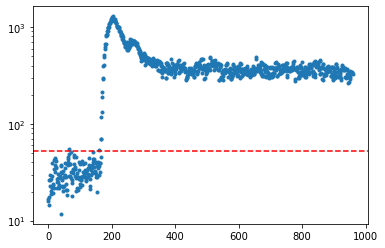

In [26]:
plt.semilogy(T2,'.')
plt.axhline(T2_lim,ls='--',c='r');

In [27]:
print(f'T2: {(T2>T2_lim).sum()/T2.shape[0]}')

T2: 0.8291666666666667
